<a href="https://colab.research.google.com/github/Chezhira/Data-Analysis-and-Machine-Learning-Projects/blob/master/Price_Predictions_for_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
uploaded = files.upload()

Saving real_estate.csv to real_estate.csv


In [5]:
#Load data set 

df = pd.read_csv('real_estate.csv')
df.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.tail()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [7]:
df.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [8]:
df.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.corr()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
transit_distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
local_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_per_unit,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae13cd6650>,
      dtype=object)

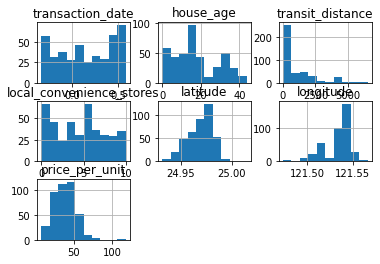

In [10]:
df.hist()

In [11]:
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = df,x = "transaction_date",
                   y = "price_per_unit",color ="house_age",
                    size="transit_distance")
figure.show()

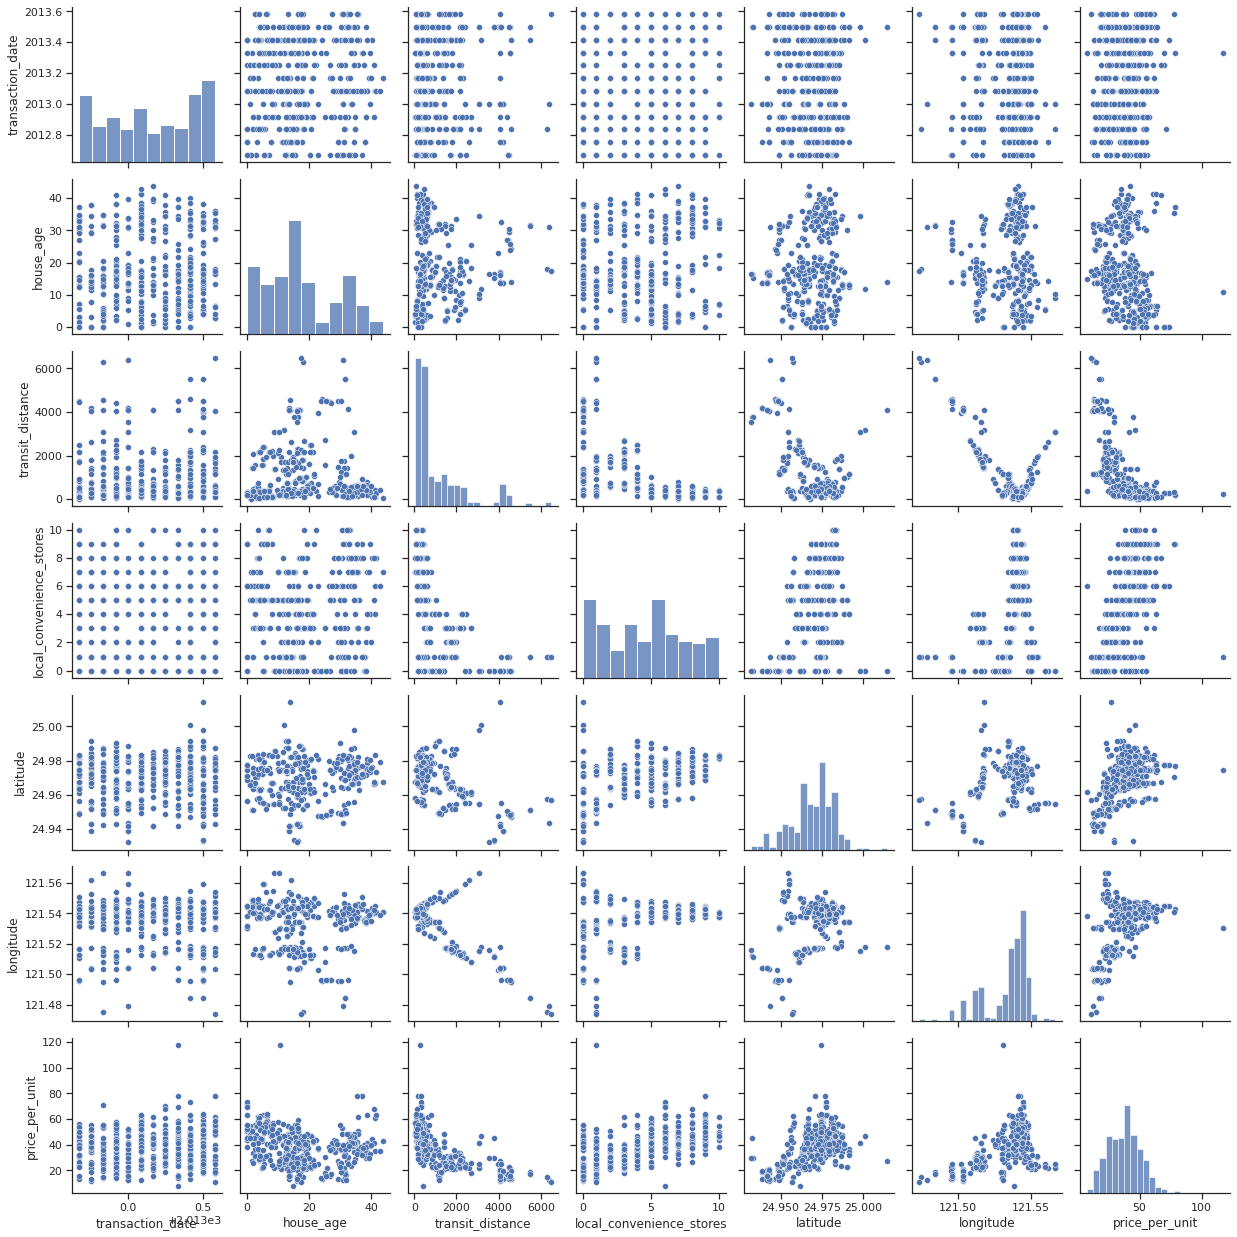

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df)

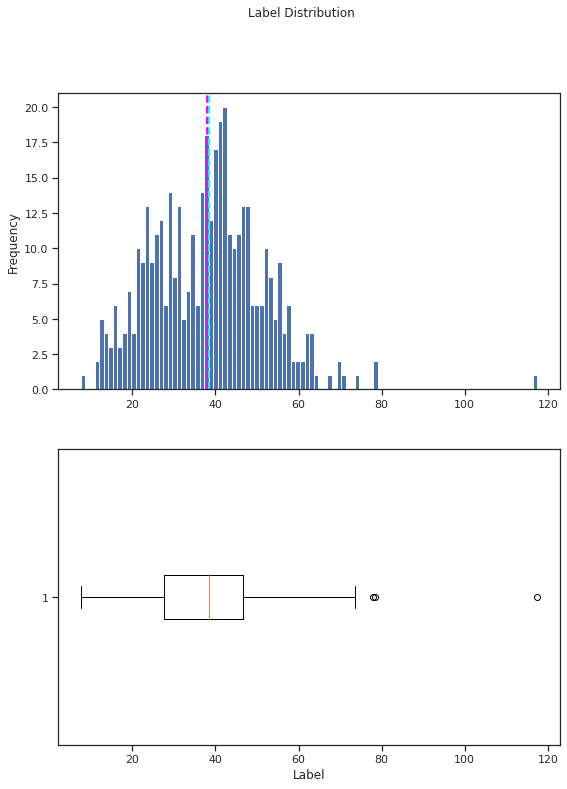

In [13]:
%matplotlib inline

# Get the label column
label = df[df.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

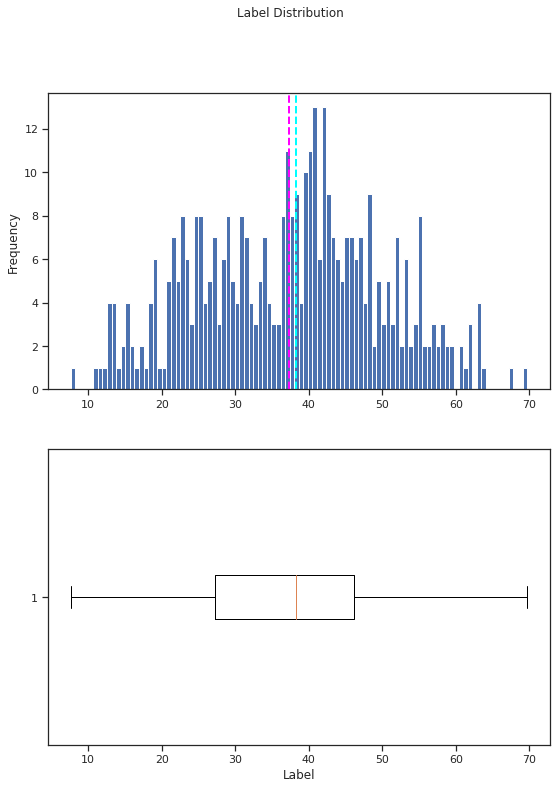

In [14]:
df = df[df['price_per_unit']<70]
# Get the label column
label = df[df.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

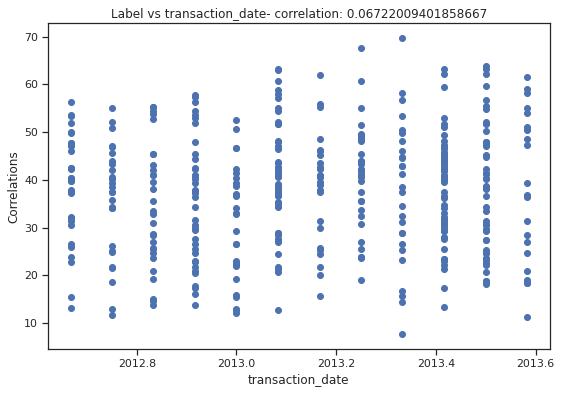

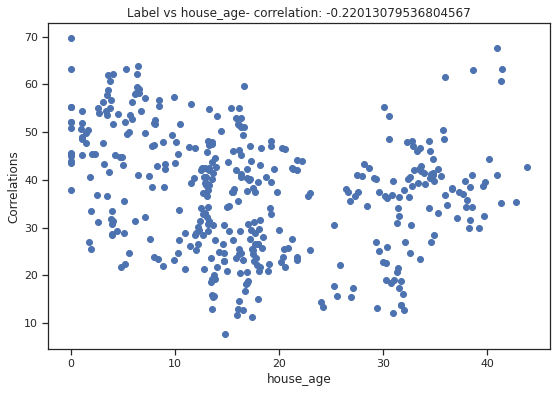

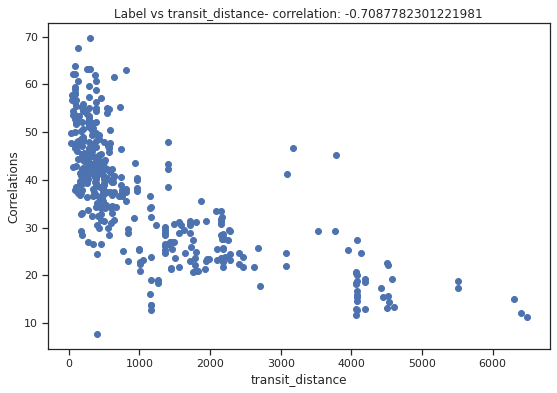

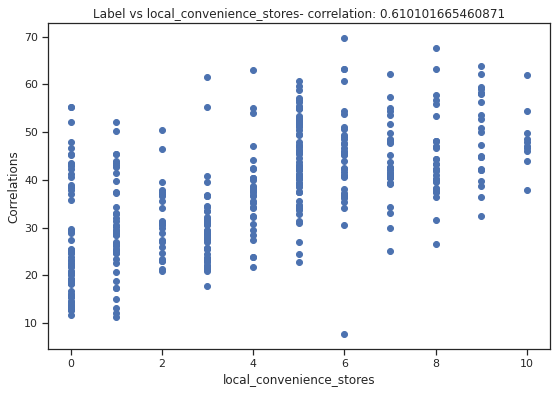

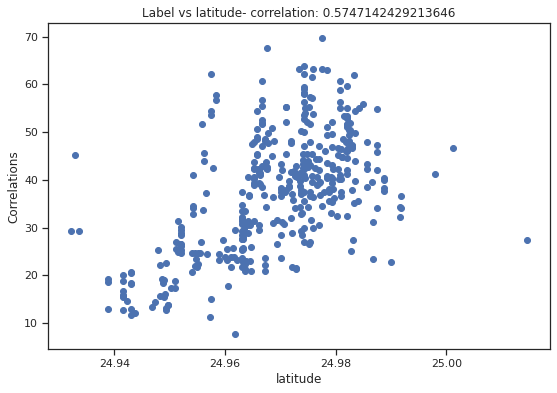

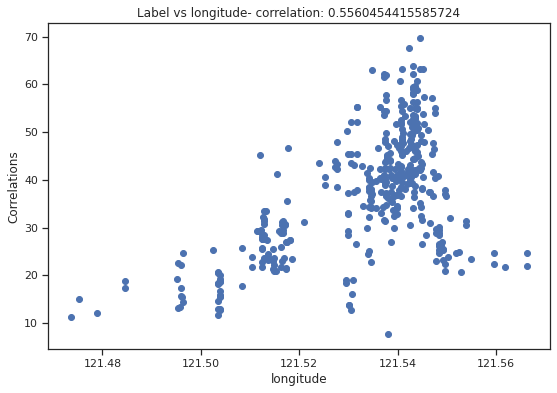

In [15]:
#View Numeric Correlations
for col in df[df.columns[0:-1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()


In [16]:
# splitting the data
from sklearn.model_selection import train_test_split
# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = df[df.columns[1:-1]].values, df[df.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285, rows
Test Set: 123 rows


In [17]:
#Preprocess the data and train a model in a pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


MSE: 35.972685560189504
RMSE: 5.997723364760124
R2: 0.6930434492574751


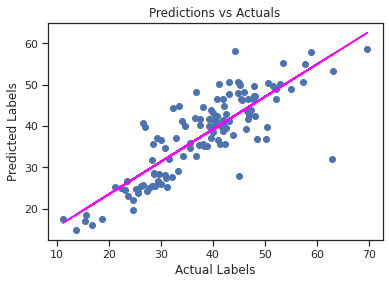

In [18]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [19]:
#Use the Trained Model
#Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))


Predictions:
49.02
16.92
